# Lab Assignment One: Exploring Table Data

#### Everett Cienkus, Blake Miller, Colin Weil

### 1. Business Understanding
This dataset contains data for all NBA games from the 2004-2005 season until March of the 2021-2022 season. From the description of the dataset, the data was collected from the NBA stats website.

This dataset can be useful for various parties, including NBA teams, coaches, players, sports bettors, or anyone looking to better understand basketball statistics. In our exploration we will be specifically looking at the application of this data for an NBA team General Manager.

According to www.investopedia.com, of the 30 NBA teams "a team is worth on average $2.12 billion", and "total revenue across the organization reached 8.76 billion in the 2018-2019 season." This makes the role of a GM extremely important, as they must manage a multi-billion dollar business.

Through analyzing thousands of NBA game data from this dataset, a GM could make better informed decisions on what statistics are most impactful on the game, and use that information to draft players which have the strengths that they need to build their team. If a machine learning algorithm used this data set, the algorithm could show the managers of an NBA team where they can improve their team. This data would allow the team to draft players that have strengths in these areas of weakness. To ensure that this algorithm would be feasible, the accuracey would have to be 60.29% acurate. This percent was used because this was the average win percentage of the teams that made the playoffs last year. To determine if the algorithm produces a correct result, the drafted player would have to increase the number of wins for a team that did not make the playoffs the year before, or ensure that the team stays in the playoffs if they did make the playoffs the year before.

## 2. Data Understanding

### 2.1 Data Description

In [1]:
import pandas as pd
import numpy as np

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)
df = pd.read_csv('NBA_datasets/games.csv') # read in the csv file
#Split stats into home and away
home_df = df[["GAME_DATE_EST","PTS_home","FG_PCT_home","FT_PCT_home","FG3_PCT_home","AST_home","REB_home", "HOME_TEAM_WINS"]]
away_df = df[["GAME_DATE_EST","PTS_away","FG_PCT_away","FT_PCT_away","FG3_PCT_away","AST_away","REB_away", "HOME_TEAM_WINS"]]

#Convert HOME_TEAM_WINS the to appropriate value based on home or away team
home_df=home_df.rename(columns={'HOME_TEAM_WINS':'WIN'})
away_df=away_df.rename(columns={'HOME_TEAM_WINS':'WIN'})
away_df["WIN"]=np.logical_not(away_df["WIN"]).astype(int)

home_df.columns = ['GAME_DATE_EST', 'PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB', 'WIN']
home_df["HOME"]= 1
away_df.columns = ['GAME_DATE_EST', 'PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB', 'WIN']
away_df["HOME"]= 0
df = pd.concat([home_df, away_df])
df['GAME_DATE_EST'] = pd.DatetimeIndex(df['GAME_DATE_EST']).year

#display
display(df.head())

Pandas: 1.4.2
Numpy: 1.21.5


,GAME_DATE_EST,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,WIN,HOME
0,2022,104.0,0.398,0.760,0.333,23.0,53.0,0,1
1,2022,101.0,0.443,0.933,0.429,20.0,46.0,1,1
2,2022,108.0,0.412,0.813,0.324,28.0,52.0,0,1
3,2022,122.0,0.484,0.933,0.400,33.0,55.0,1,1
4,2022,115.0,0.551,0.750,0.407,32.0,39.0,0,1


Home and away statistics were originally in the same instance. We split each instance into two, one instance representing the home game and one representing the away game played. The home feature is shown as 1 for a home game and a 0 as not home (away).
Also, the GAME_DATE_EST was originally a full date but we changed that to be just the year.

In [2]:
# find the data summary
display(df.describe())

,GAME_DATE_EST,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,WIN,HOME
count,51592.000000,51394.000000,51394.000000,51394.000000,51394.000000,51394.000000,51394.000000,51592.000000,51592.000000
mean,2012.410955,101.700082,0.454789,0.758893,0.352655,22.070339,42.715473,0.500000,0.500000
std,5.413199,13.333345,0.056352,0.102066,0.111117,5.202080,6.604647,0.500005,0.500005
min,2003.000000,33.000000,0.244000,0.143000,0.000000,4.000000,15.000000,0.000000,0.000000
25%,2008.000000,93.000000,0.417000,0.696000,0.281000,18.000000,38.000000,0.000000,0.000000
50%,2012.000000,101.000000,0.453000,0.765000,0.353000,22.000000,42.000000,0.500000,0.500000
75%,2017.000000,111.000000,0.494000,0.829000,0.423000,25.000000,47.000000,1.000000,1.000000
max,2022.000000,168.000000,0.687000,1.000000,1.000000,50.000000,81.000000,1.000000,1.000000


In [3]:
# create a data description table
data_des = pd.DataFrame()

data_des['Features'] = df.columns

data_des['Description'] = ['date the game occured', 'number of points scored', 'percentage of all shots made',
                          'percentage of free throws made', 'percentage of three point shots made',
                          'number of assists', 'number of rebounds',
                          'whether the game was won', 'whether the team was home or away']

data_des['Scales'] = ['ordinal'] * 2 + ['ratio'] * 3 + ['ordinal'] * 2 + ['norminal'] * 2

data_des['Discrete\Continuous'] = ['discrete'] + ['continuous'] * 6  + ['discrete'] * 2

data_des['Range'] = ['Placeholder','33 - 168','.244 - .687','.143 - 1','0 - 1','4 - 50','15 - 81','0: No; 1: Yes','0: No; 1: Yes']

data_des

,Features,Description,Scales,Discrete\Continuous,Range
0,GAME_DATE_EST,date the game occured,ordinal,discrete,Placeholder
1,PTS,number of points scored,ordinal,continuous,33 - 168
2,FG_PCT,percentage of all shots made,ratio,continuous,.244 - .687
3,FT_PCT,percentage of free throws made,ratio,continuous,.143 - 1
4,FG3_PCT,percentage of three point shots made,ratio,continuous,0 - 1
5,AST,number of assists,ordinal,continuous,4 - 50
6,REB,number of rebounds,ordinal,continuous,15 - 81
7,WIN,whether the game was won,norminal,discrete,0: No; 1: Yes
8,HOME,whether the team was home or away,norminal,discrete,0: No; 1: Yes


The table above shows the features description, scales, discrete or continuous classification, and range.

### 2.2 Data Quality

In [4]:
# find the data type
print('Number of missing values: ', df['PTS'].isna().sum())
df = df.dropna()
print(df.info())

Number of missing values:  198
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51394 entries, 0 to 25795
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GAME_DATE_EST  51394 non-null  int64  
 1   PTS            51394 non-null  float64
 2   FG_PCT         51394 non-null  float64
 3   FT_PCT         51394 non-null  float64
 4   FG3_PCT        51394 non-null  float64
 5   AST            51394 non-null  float64
 6   REB            51394 non-null  float64
 7   WIN            51394 non-null  int64  
 8   HOME           51394 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 3.9 MB
None


Based on the datafram information, we found that there was 198 missing values found in the dataset (out of 51394 instances). Since we broke the away games and homes games in two, the original number of missing values was only 99 (out of 25796 instances). 

We decided to remove the instances because the missing values were for all of the features so they didn't add any statistical data.

In [5]:
# find the duplicate instances
idx = df.duplicated()

# find the number of duplicate (not first show)
print('Number of duplicate instances: ',len(df[idx]))

# df.drop_duplicates()
df[idx]

Number of duplicate instances:  28


,GAME_DATE_EST,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,WIN,HOME
2247,2021,96.0,0.409,0.650,0.324,18.0,48.0,1,1
2250,2021,106.0,0.461,0.643,0.357,28.0,46.0,1,1
2251,2020,122.0,0.523,0.760,0.361,26.0,45.0,1,1
2255,2020,100.0,0.381,0.848,0.258,21.0,54.0,1,1
2258,2020,125.0,0.489,0.773,0.485,33.0,37.0,1,1
2260,2020,124.0,0.529,0.563,0.452,31.0,52.0,1,1
2264,2020,128.0,0.512,0.742,0.415,27.0,54.0,0,1
2267,2020,119.0,0.470,0.688,0.412,36.0,53.0,1,1
2270,2020,138.0,0.556,0.692,0.556,25.0,60.0,1,1
2272,2020,121.0,0.489,0.724,0.235,28.0,50.0,1,1


After removing the missing values, we looked to see if there was duplicated values.

By running pandas.duplicated(), it was returned that 28 instances were duplicated. After further investigation of the data, we can see that the games were actually not duplicates by comparing the teams and dates. We cross referenced the duplicate table with the original database and saw that these games that came back as duplicated had unique date+team combinations. This shows that there was no duplications because teams only play one game a day. By removing the team feature and modifying the date feature to only include year, we might have changed the algorithm to find the duplicate instances.

Lastly for the data quality, we decided to keep outliers because outlier statistics for sports games are very important. Games where teams play exceptionally well in certain features can explain a lot on how they play against other teams as well as what team compositions play well together.

## 3. Data Visualization

### 3.1 Data Exploration

In [6]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
np.warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
df_wins = df[df['WIN'] == 1]
df_losses =  df[df['WIN'] == 0]

#### 3.1.1 Points by Win/Loss

Text(0.5, 1.0, 'Violin Plot of Points for Win vs Loss')

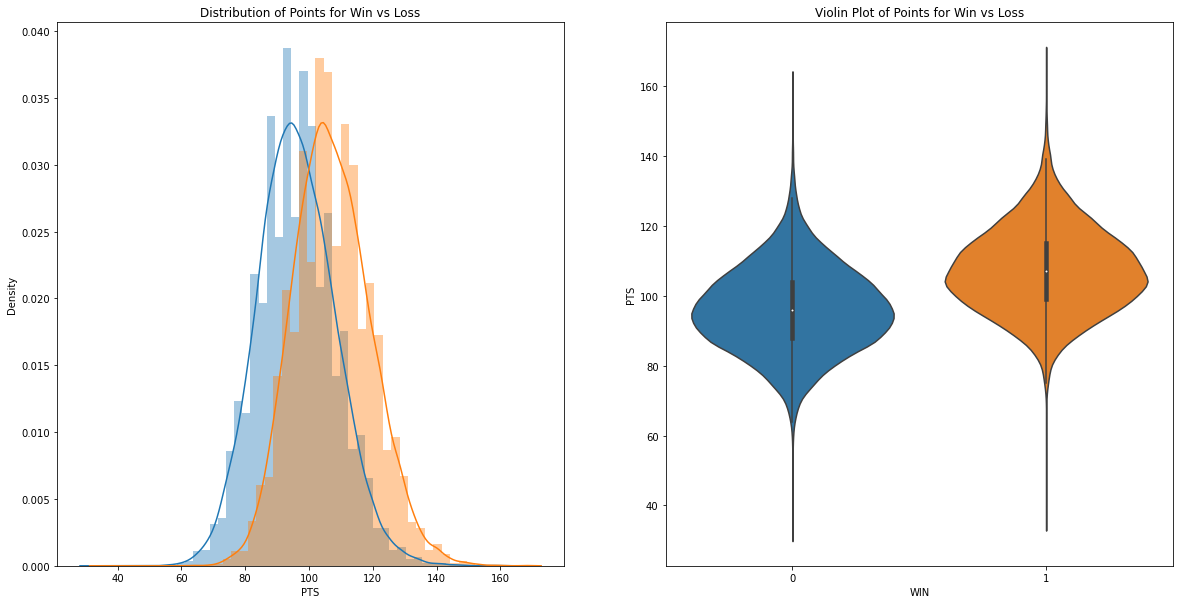

In [8]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(df_losses.PTS)
sns.distplot(df_wins.PTS)
plt.title('Distribution of Points for Win vs Loss')


ax2 = plt.subplot(1,2,2)
sns.violinplot(x="WIN", y="PTS", data=df)
plt.title('Violin Plot of Points for Win vs Loss')

Shown by the histogram, points distribution is normal both for wins and losses. 

Shown by the Violin plots, the median and IQR of wins is obviously higher than that of the loss. The median seems to be around 10 more for the wins than losses so teams that win score 10 more points than teams that lose on average. This shows that scoring more points in general is important to win which is logical because the team that scores more points is the team that wins the game.

#### 3.1.2 Field Goal Percent by Win/Loss

Text(0.5, 1.0, 'Violin Plot of Field Goal Percent for Win vs Loss')

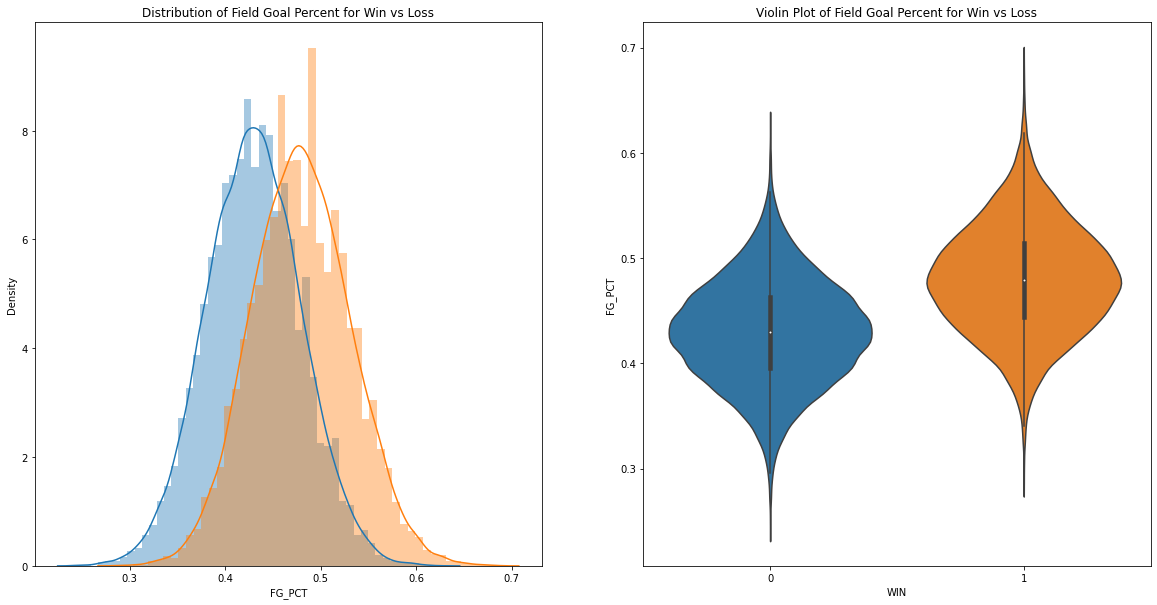

In [9]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(df_losses.FG_PCT)
sns.distplot(df_wins.FG_PCT)
plt.title('Distribution of Field Goal Percent for Win vs Loss')


ax2 = plt.subplot(1,2,2)
sns.violinplot(x="WIN", y="FG_PCT", data=df)
plt.title('Violin Plot of Field Goal Percent for Win vs Loss')

Shown by the histogram, field goal percentage distribution is normal both for wins and losses. 

Shown by the Violin plots, the median and IQR of wins is higher than that of the loss. This shows that having a higher field goal percentage is important to win because it means the more shots you make which means more points.

#### 3.1.3 Free Throw Percent by Win/Loss

Text(0.5, 1.0, 'Violin Plot of Free Throw Percent Win vs Loss')

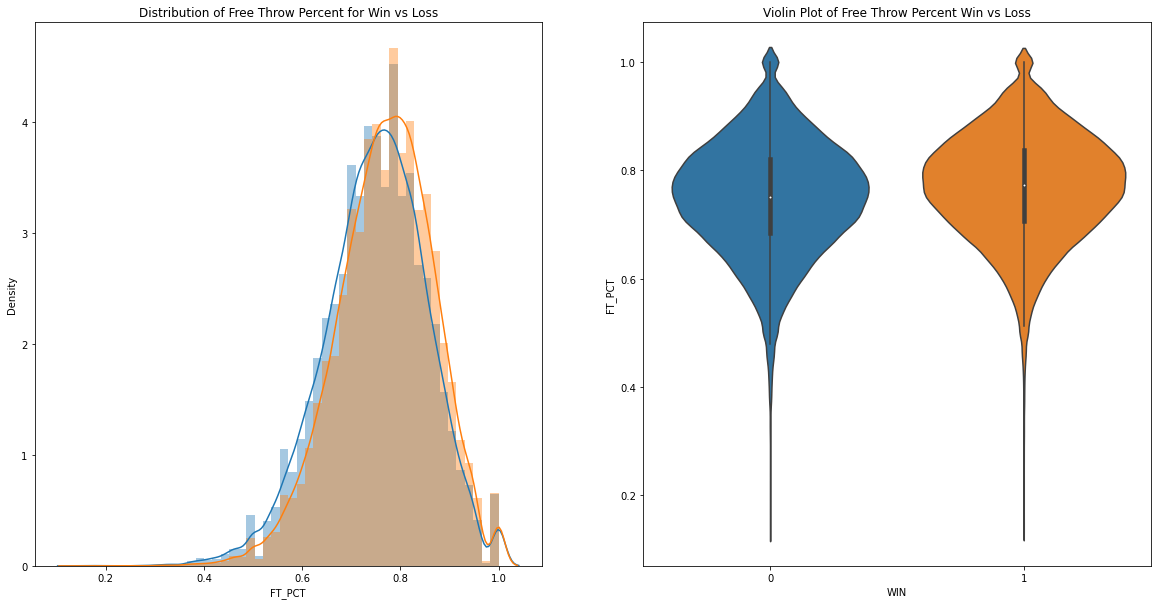

In [10]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(df_losses.FT_PCT)
sns.distplot(df_wins.FT_PCT)
plt.title('Distribution of Free Throw Percent for Win vs Loss')


ax2 = plt.subplot(1,2,2)
sns.violinplot(x="WIN", y="FT_PCT", data=df, split=False)
plt.title('Violin Plot of Free Throw Percent Win vs Loss')

Shown by the histogram, field throw percentage distribution is normal both for wins and losses. 

Shown by the Violin plots, the median and IQR of wins and losses are very similar. This is very interesting because this means that players are very consistent in their free throws. This makes sense because it is a non contested shot that many good players practice and have a very good free throw percentage. This shows that this feature is probably the least useful for winning games compared to the others.

#### 3.1.4   3-Point Percentage by Win/Loss

Text(0.5, 1.0, 'Violin Plot of 3-Point Percentage for Win vs Loss')

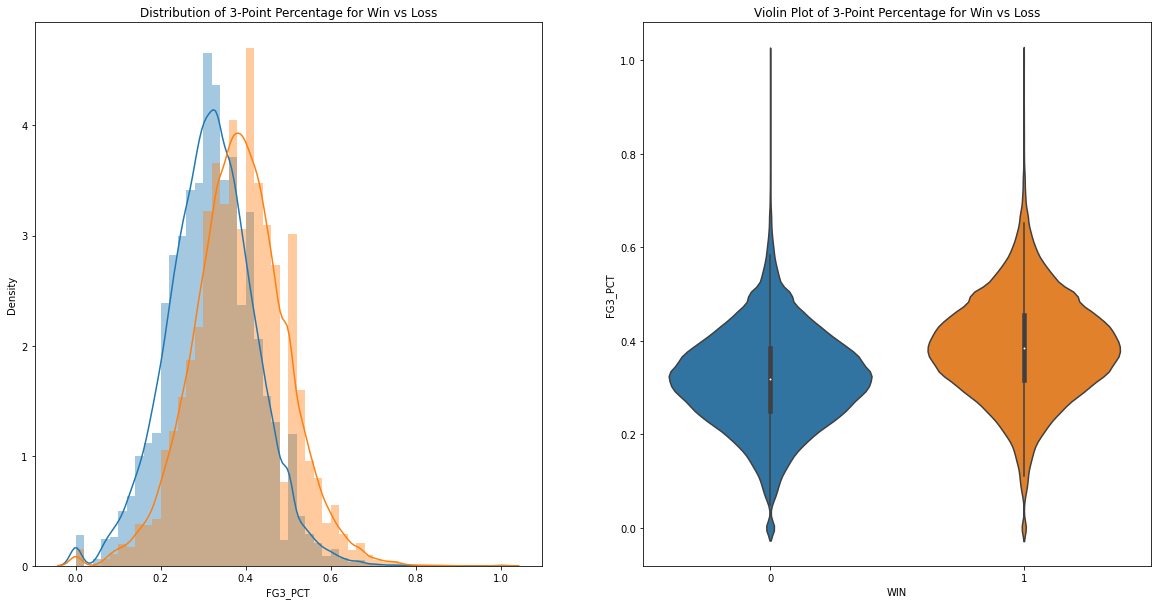

In [11]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(df_losses.FG3_PCT)
sns.distplot(df_wins.FG3_PCT)
plt.title('Distribution of 3-Point Percentage for Win vs Loss')


ax2 = plt.subplot(1,2,2)
sns.violinplot(x="WIN", y="FG3_PCT", data=df)
plt.title('Violin Plot of 3-Point Percentage for Win vs Loss')

Shown by the histogram, 3-point percentage distribution is normal both for wins and losses. 

Shown by the Violin plots, the median and IQR of wins is higher than that of the loss. This shows that having a higher 3-point percentage is important to win because it means more points worth three points which is better to win games. 3-point shots have changed the NBA in recent years and we will explore this later in section 3.2

#### 3.1.5 Assists by Win/ Loss

Text(0.5, 1.0, 'Violin Plot of Assists for Win vs Loss')

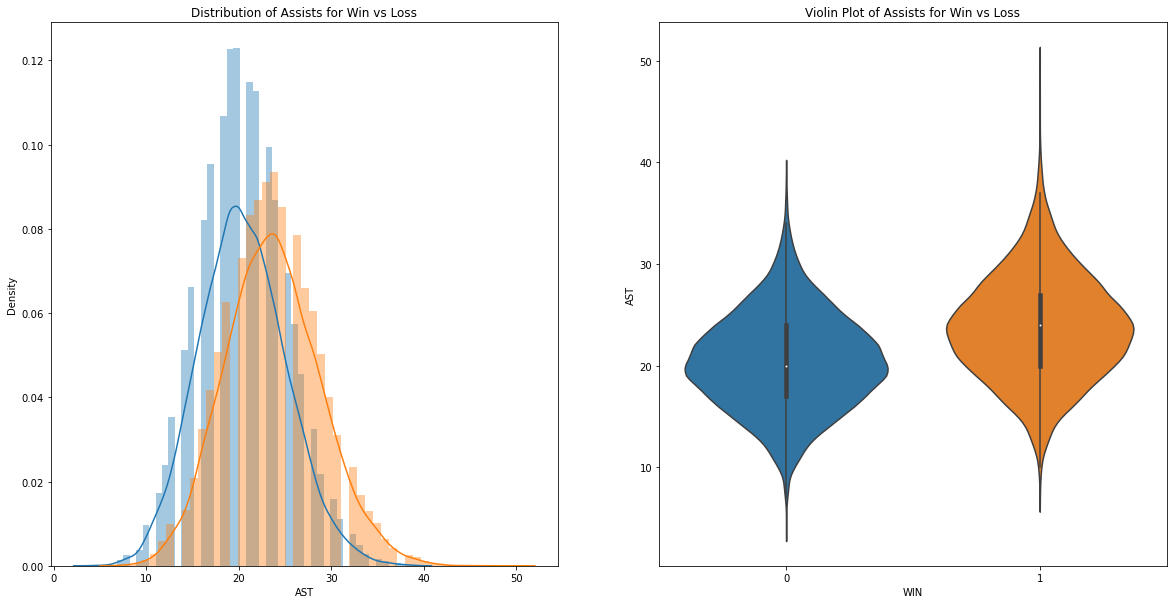

In [12]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(df_losses.AST)
sns.distplot(df_wins.AST)
plt.title('Distribution of Assists for Win vs Loss')


ax2 = plt.subplot(1,2,2)
sns.violinplot(x="WIN", y="AST", data=df)
plt.title('Violin Plot of Assists for Win vs Loss')

Shown by the histogram, assist distribution is normal both for wins and losses. 

Shown by the Violin plots, the median and IQR of wins is higher than that of the loss. This shows that having more assists is important to win because that means more passes to people who makes shots for more points to win. After points, assists has the biggest difference in distributions which makes sense because assists and points tend to be correlated since most points are scored by someone passing to another person.

#### 3.1.6 Rebounds by Win/ Loss

Text(0.5, 1.0, 'Violin Plot of Rebounds for Win vs Loss')

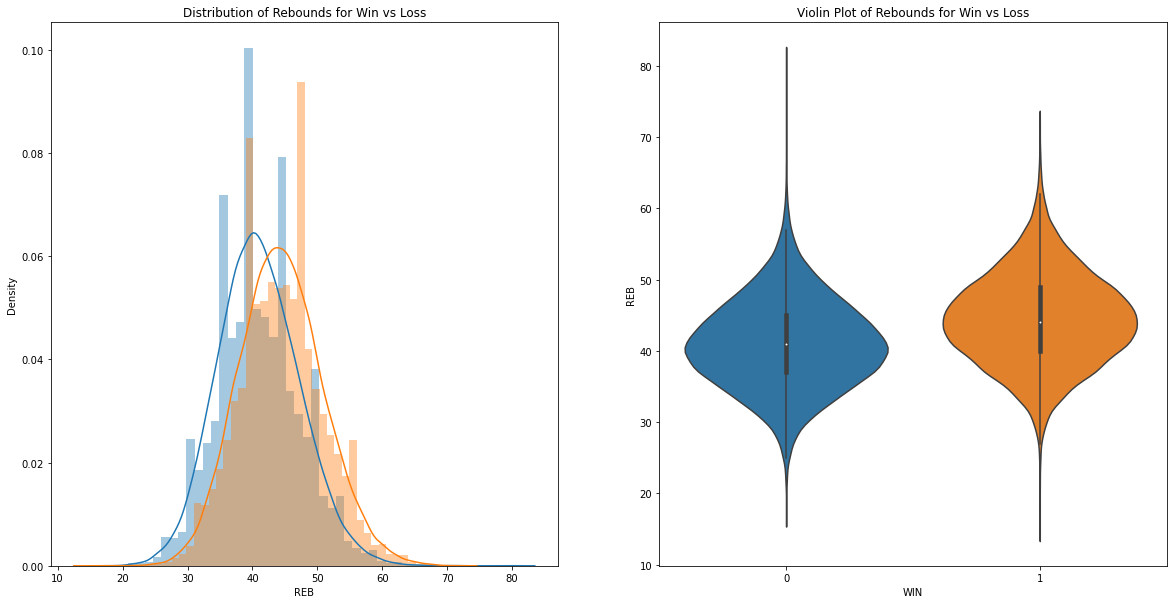

In [13]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(df_losses.REB)
sns.distplot(df_wins.REB)
plt.title('Distribution of Rebounds for Win vs Loss')


ax2 = plt.subplot(1,2,2)
sns.violinplot(x="WIN", y="REB", data=df)
plt.title('Violin Plot of Rebounds for Win vs Loss')

Shown by the histogram, rebound distribution is normal both for wins and losses. 

Shown by the Violin plots, the median and IQR of rebound is higher than that of the loss. This shows that having more assists is important to win because the more rebounds means more opportunities to score on offense or less opportunities for your opponent to score while you are on defense. After free throw percentage, rebounds has the least difference in distributions which is an interesting thing to note as a GM because having a point scorer is more important than someone that can only rebound.

#### 3.1.7 Wins per Year

    YEAR  NUM_GAMES
0   2003        465
1   2004       1295
2   2005       1435
3   2006       1451
4   2007       1404
5   2008       1442
6   2009       1428
7   2010       1432
8   2011        915
9   2012       1580
10  2013       1432
11  2014       1441
12  2015       1419
13  2016       1429
14  2017       1417
15  2018       1382
16  2019       1332
17  2020        814
18  2021       1701
19  2022        483


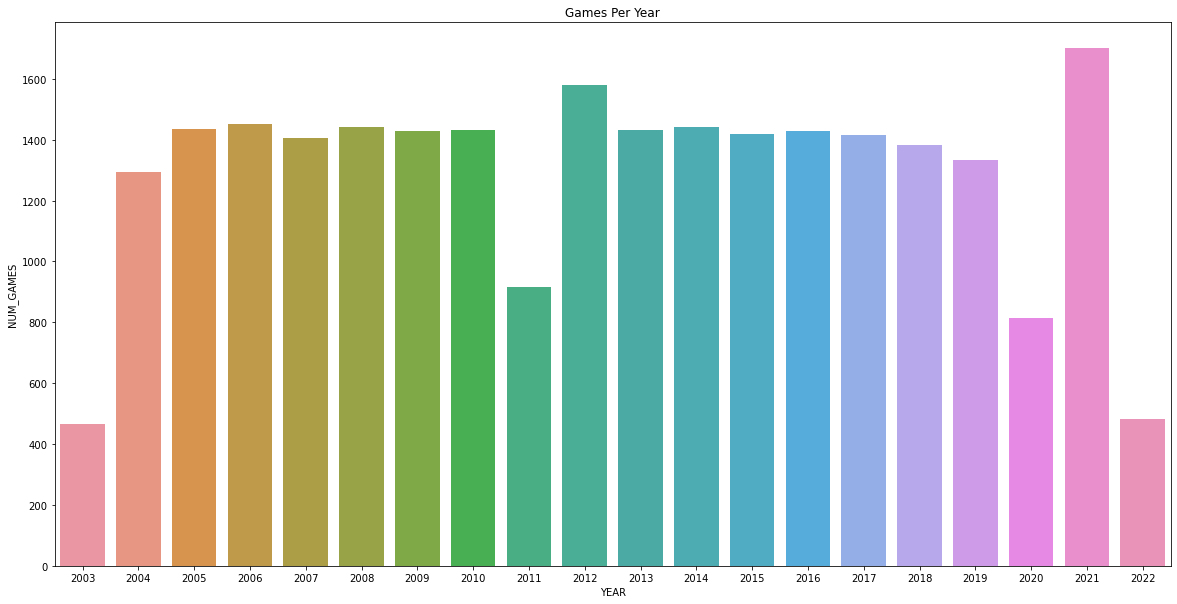

In [26]:
list_year_games = pd.Series(df.groupby('GAME_DATE_EST')['WIN'].sum()).to_list()
list_years = df['GAME_DATE_EST'].unique()
list_years.sort()

df_years_games = pd.DataFrame({'YEAR': list_years, 'NUM_GAMES':list_year_games })

plt.figure(figsize=(20,10))
sns.barplot(data=df_years_games, x='YEAR', y='NUM_GAMES')
plt.title('Games Per Year')

print(df_years_games)

This bar chart gives some interesting information about how many games were played in each season and also how many games were recorded from each season. The low seasons like 2003, 2011, 2020, and 2022 give some information.

The 2003 and 2022 seasons were probably when the data started and stopped being collected which explains their limited games but 2011 and 2020 are short for different reasons. In 2011 there was a lockout so there were not as many games played and in 2020 COVID-19 came to the United States and cut the season short. Both of these facts might make us want to focus on these seasons if their is a similar situation to them in the future or take them out of the data if there are outliers compared to the other seasons. In general, there does not seem to be outliers caused by these seasons, but there are some niche effects caused by them which we discuss more in section 3.2.

#### 3.1.8 Wins by Home or Away

Total number of wins home:  15155
Total number of games home:  25697
Total number of wins away:  10542
Total number of games away:  25697


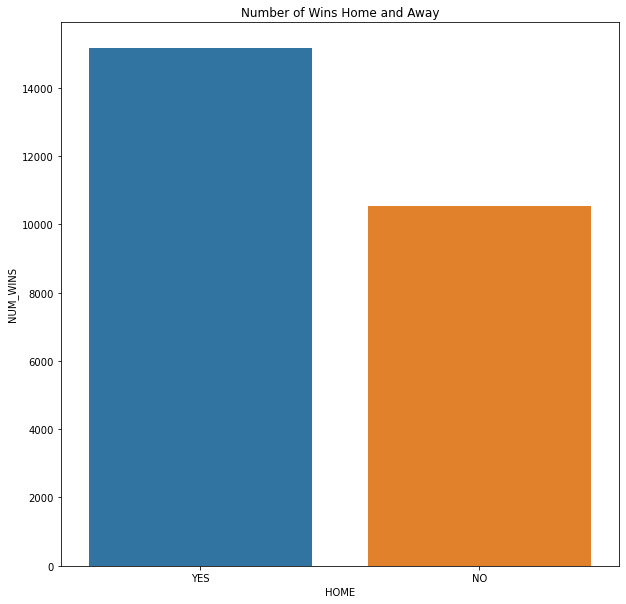

In [25]:
num_home_wins = len(df_wins[(df_wins['HOME'] == 1)])
num_away_wins = len(df_wins[(df_wins['HOME'] == 0)])

home_win_perc = num_home_wins / len(df[df['HOME'] == 1])
away_win_perc = num_away_wins / len(df[df['HOME'] == 0])

plt.figure(figsize=(10,10))

df_num_wins_home_away = pd.DataFrame({'HOME': ['YES','NO'], 'NUM_WINS':[num_home_wins, num_away_wins] })
sns.barplot(data=df_num_wins_home_away, x='HOME', y='NUM_WINS')
plt.title('Number of Wins Home and Away')

print('Total number of wins home: ', num_home_wins)
print('Total number of games home: ', len(df[df['HOME'] == 1]))
print('Total number of wins away: ', num_away_wins)
print('Total number of games away: ', len(df[df['HOME'] == 0]))

This data and barchat show that playing at home makes a significant difference in winning games. In all sports, teams and players tend to be more comfortable at home because they don't have to fly or travel to the game, they are used to the court that they practice on, and their fans supporting them all makes big differences. This data supports the 'Home Team Advantage' phenomenon in the NBA.

### 3.2 Data Relationship Exploration

#### QUESTIONS:
1. What is the most important stat for winning games (is there a difference for home and away)?
2. Is there a correlation of Winning/ 3pts through the years?
3. Throughout the years, has playing at home become more or less important for winning?

#### 3.2.1 What is the most important stat for winning games?

In [ ]:
import seaborn as sns
#sns.pairplot(df, hue='WIN')

In [ ]:
import matplotlib.pyplot as plt
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(style="darkgrid") # one of the many styles to plot using
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
#f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(away_df.drop(columns=["HOME"]).corr(), cmap=cmap, annot=True, ax = ax1)
ax1.title.set_text('Away Correlation Matrix')
sns.heatmap(home_df.drop(columns=["HOME"]).corr(), cmap=cmap, annot=True, ax = ax2)
ax2.title.set_text('Home Correlation Matrix')

According to the correlation table, we can see that "FG_PCT" (Field Goal Percentage) has the highest correlation with winning. Whether the team is home or away, this statistic stays as the statistic with the highest correlation with winning. Another statistic that has a very high correlation with winning is "PTS" (Points). To win the game, the team must score more points than the opposing team, meaning the more points the better. However, this table shows that it is more important to score a higher percentage of shots than it is to score as many points as possible.

#### 3.2.2 Is there a correlation of Winning/ 3pts through the years?

In [ ]:

corr_df = df
corr_df=[corr_df[corr_df['GAME_DATE_EST'] == y] for y in corr_df['GAME_DATE_EST'].unique()]
years = []
corr = []
for x in corr_df:
    years.append(x.GAME_DATE_EST.unique()[0])
    corr.append(x.corr().FG3_PCT['WIN'])

plt.subplots(figsize=(20, 5))
plt.subplot(1,1,1)
sns.lineplot(years, corr)
plt.title("3pt FG Correlation With Win Over the Seasons")
plt.show()

According to the graph above, over the years, the correlation between "3pt FG" (3-point shots made) and "Win" (whether the team won or not) increased. This data shows that the play style of the game of basketball has changed over the years. The game of basketball used to be a more physical sport, but as skills and ball handling increases, players are able to take advantage of the 3-point shot. The shot is worth more points, allowing the team to score more points per possession.

#### 3.2.3 Home vs Away Wins by Year

In [ ]:
# the cross tab operator provides an easy way to get these numbers
df_wins = (df[(df['WIN'] == 1)])
df_home = (df[(df['HOME'] == 1)])
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

pd.crosstab([df_home['GAME_DATE_EST']], df_home.WIN.astype(bool)).plot(kind='bar', stacked=True, ax = ax1, color = ['red', 'green'])
ax1.title.set_text('Total Home Wins and Losses')

df_wins = pd.crosstab([df_home['GAME_DATE_EST']], df_home.WIN.astype(bool))
win_rate = df_wins.div(df_wins.sum(1).astype(float), axis=0)
win_rate.plot(kind = 'bar', stacked = True,  ax = ax2, color = ['red', 'green'])
ax2.title.set_text('Ratio of Home Wins to Losses')

The graph on the left shows the total amount of wins and losses per year since 2003. The graph on the right shows the winning percentage of the home team. The graph on the right allows us to compare years by creating the ratio of wins to loss, putting all the years on a comparable scale. The trend in the graph to the right shows that the ratio of losses to wins is increasing, meaning that teams are losing at home more than they have before. This could be due to many reasons; coaches could be training their players to dismiss distractions or maybe the league is putting restrictions on stadiums which is causing fans to be tamer. An interesting piece of information can be seen in the year 2020. Due to covid, a majority of the 2020 season was played in Orlando, Florida in a controlled, "covid-free", environment. In this environment, the teams were never playing at their home stadiums, preventing the crowd to influence the game. The graph on the right shows that the 2020 season was the season where the ratio of home wins to losses was the closest to even. This shows the impact a crowd or stadium can have on a game.

## 4. Dimensionality Reduction

UMAP is a dimensionality reduction algorithm that works by creating a connected graph of all the points in a dataset. Each of the datapoints are given radii. If the radii of two datapoints intersect then they are considered neighbors, and a connection is made in the graph. The size of the radii is also varying; points that are in dense regions have smaller radii, while points in less dense regions have larger radii. Density is defined as higher when the $k$th nearest neighbor is close, and lower when the $k$th nearest neighbor is far. Using a larger $k$ value will keep local structure preserved in the projection, while a lower $k$ will have more global structure preserved.

In [ ]:
import umap
import umap.plot
data = df.drop(columns=['WIN','GAME_DATE_EST', 'HOME'])

mapper = umap.UMAP(n_neighbors=200, min_dist=0.01).fit(data)
umap.plot.points(mapper, labels=df['WIN'])

There is quite a bit of mixing between win and loss, but we can still see that the left side of the projection contains mostly losses and the right side contains mostly wins. While it isn't a perfect projection, you can conclude from the plot that points on the right are more likely to be a win, and those on the left are more likely to be a loss. This specific example of using a game's data to predict win or loss would not be as useful for real life application since you don't need to predict a game that has already finished. However, if we were to do a similar projection with the stats of games that are part-way through, we might be able to predict the outcome of a game.